# North Wind Traders Analysis

- This notebook aims to analysis the trades of North Wind.

        - This database contains the following data sets that complete the database: 
        1.Customer 
        2.Prodcuts 
        3.Orders                    
        4.Order Details 
        5.Employees 
        6.Suppliers data.

In [1]:
# Import dependacies
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Define path to Database

In [2]:
db_path = "northwind_sales.db"

## Load the data in the database

In [3]:
# Create a dictionary containing the data, for better loading
files = {
    "Categories":"data/categories.csv",
    "Customers":"data/customers.csv",
    "Employees":"data/employees.csv",
    "Products":"data/products.csv",
    "Company_Territories":"data/territories.csv",
    "Regions":"data/regions.csv",
    "Orders":"data/orders.csv",
    "Order_Details":"data/orders_details.csv",
    "Employee_Territories":"data/employee_territories.csv"
}

## Connect to SQLite Database

In [4]:
connection = sqlite3.connect(db_path)

## Create a loop to add each table in the dictionary

In [5]:
for table , file_path in files.items():
    #Load csv into dataframe
    data = pd.read_csv(file_path)
    # Insert data frames into SQLite database
    data.to_sql(table,connection,if_exists='replace',index=False)
    print(f"Table {table} created and data load successfully")

# Close the connection
connection.close()    

Table Categories created and data load successfully
Table Customers created and data load successfully
Table Employees created and data load successfully
Table Products created and data load successfully
Table Company_Territories created and data load successfully
Table Regions created and data load successfully
Table Orders created and data load successfully
Table Order_Details created and data load successfully
Table Employee_Territories created and data load successfully


## Connect again and view database

In [6]:
with sqlite3.connect(db_path) as connection:
    cursor = connection.cursor()

    # List the tables
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = cursor.fetchall()
    # print Categories the tables
    for table in tables:
        print(table[0])

Territories
Employee Territories
Company Territories
Categories
Customers
Employees
Products
Company_Territories
Regions
Orders
Order_Details
Employee_Territories


In [7]:
cursor.execute("""
    SELECT *
    FROM Products



""")
rows = cursor.fetchall()
print("Customers Table")
for row in rows:
    print(row)

Customers Table
(1, 'Chai', 8, 1, '10 boxes x 30 bags', 18.0, 39, 0, 10, 1)
(2, 'Chang', 1, 1, '24 - 12 oz bottles', 19.0, 17, 40, 25, 1)
(3, 'Aniseed Syrup', 1, 2, '12 - 550 ml bottles', 10.0, 13, 70, 25, 0)
(4, "Chef Anton's Cajun Seasoning", 2, 2, '48 - 6 oz jars', 22.0, 53, 0, 0, 0)
(5, "Chef Anton's Gumbo Mix", 2, 2, '36 boxes', 21.35, 0, 0, 0, 1)
(6, "Grandma's Boysenberry Spread", 3, 2, '12 - 8 oz jars', 25.0, 120, 0, 25, 0)
(7, "Uncle Bob's Organic Dried Pears", 3, 7, '12 - 1 lb pkgs.', 30.0, 15, 0, 10, 0)
(8, 'Northwoods Cranberry Sauce', 3, 2, '12 - 12 oz jars', 40.0, 6, 0, 0, 0)
(9, 'Mishi Kobe Niku', 4, 6, '18 - 500 g pkgs.', 97.0, 29, 0, 0, 1)
(10, 'Ikura', 4, 8, '12 - 200 ml jars', 31.0, 31, 0, 0, 0)
(11, 'Queso Cabrales', 5, 4, '1 kg pkg.', 21.0, 22, 30, 30, 0)
(12, 'Queso Manchego La Pastora', 5, 4, '10 - 500 g pkgs.', 38.0, 86, 0, 0, 0)
(13, 'Konbu', 6, 8, '2 kg box', 6.0, 24, 0, 5, 0)
(14, 'Tofu', 6, 7, '40 - 100 g pkgs.', 23.25, 35, 0, 0, 0)
(15, 'Genen Shouyu', 6, 2

## Try Join two tables

In [8]:
cursor.execute("""
    SELECT *
    FROM Order_Details
    JOIN Products on Order_Details.productid = Products.productid                      
""")

rows = cursor.fetchall()
print("Joined Table")

for row in rows:
    print(row)
    

Joined Table
(10248, 11, 14.0, 12, 0.0, 11, 'Queso Cabrales', 5, 4, '1 kg pkg.', 21.0, 22, 30, 30, 0)
(10248, 42, 9.8, 10, 0.0, 42, 'Singaporean Hokkien Fried Mee', 20, 5, '32 - 1 kg pkgs.', 14.0, 26, 0, 0, 1)
(10248, 72, 34.8, 5, 0.0, 72, 'Mozzarella di Giovanni', 14, 4, '24 - 200 g pkgs.', 34.8, 14, 0, 0, 0)
(10249, 14, 18.6, 9, 0.0, 14, 'Tofu', 6, 7, '40 - 100 g pkgs.', 23.25, 35, 0, 0, 0)
(10249, 51, 42.4, 40, 0.0, 51, 'Manjimup Dried Apples', 24, 7, '50 - 300 g pkgs.', 53.0, 20, 0, 10, 0)
(10250, 41, 7.7, 10, 0.0, 41, "Jack's New England Clam Chowder", 19, 8, '12 - 12 oz cans', 9.65, 85, 0, 10, 0)
(10250, 51, 42.4, 35, 0.15, 51, 'Manjimup Dried Apples', 24, 7, '50 - 300 g pkgs.', 53.0, 20, 0, 10, 0)
(10250, 65, 16.8, 15, 0.15, 65, 'Louisiana Fiery Hot Pepper Sauce', 2, 2, '32 - 8 oz bottles', 21.05, 76, 0, 0, 0)
(10251, 22, 16.8, 6, 0.05, 22, "Gustaf's Knäckebröd", 9, 5, '24 - 500 g pkgs.', 21.0, 104, 0, 25, 0)
(10251, 57, 15.6, 15, 0.05, 57, 'Ravioli Angelo', 26, 5, '24 - 250 g p

## Present the Data in a Dataframe for better analysis

In [33]:
query_1 = """
SELECT *
FROM Products
"""

In [39]:
products = pd.read_sql_query(query_1,connection)

# Rename column 'unitprice' to 'price_per_unit'
products = products.rename(columns={'unitprice': 'selling_price'})

products.head()

,productid,productname,supplierid,categoryid,quantityperunit,selling_price,unitsinstock,unitsonorder,reorderlevel,discontinued
0,1,Chai,8,1,10 boxes x 30 bags,18.00,39,0,10,1
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,1
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1


In [35]:
# Create a SQL query to retrive the data
query = """
    SELECT *
    FROM Order_Details
"""


In [43]:
orders = pd.read_sql_query(query,connection)
orders = orders.rename(columns={'unitprice': 'production_price'})
orders.head()


,orderid,productid,production_price,quantity,discount
0,10248,11,14.0,12,0.0
1,10248,42,9.8,10,0.0
2,10248,72,34.8,5,0.0
3,10249,14,18.6,9,0.0
4,10249,51,42.4,40,0.0


In [44]:
products_orders = pd.merge(left=products,right=orders,how='inner',on='productid')
products_orders.head()

,productid,productname,supplierid,categoryid,quantityperunit,selling_price,unitsinstock,unitsonorder,reorderlevel,discontinued,orderid,production_price,quantity,discount
0,1,Chai,8,1,10 boxes x 30 bags,18.0,39,0,10,1,10285,14.4,45,0.20
1,1,Chai,8,1,10 boxes x 30 bags,18.0,39,0,10,1,10294,14.4,18,0.00
2,1,Chai,8,1,10 boxes x 30 bags,18.0,39,0,10,1,10317,14.4,20,0.00
3,1,Chai,8,1,10 boxes x 30 bags,18.0,39,0,10,1,10348,14.4,15,0.15
4,1,Chai,8,1,10 boxes x 30 bags,18.0,39,0,10,1,10354,14.4,12,0.00


In [45]:
# Drop all irrelevant columns
products_orders.columns

Index(['productid', 'productname', 'supplierid', 'categoryid',
       'quantityperunit', 'selling_price', 'unitsinstock', 'unitsonorder',
       'reorderlevel', 'discontinued', 'orderid', 'production_price',
       'quantity', 'discount'],
      dtype='object')

## EDA

In [46]:
products_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   productid         2155 non-null   int64  
 1   productname       2155 non-null   object 
 2   supplierid        2155 non-null   int64  
 3   categoryid        2155 non-null   int64  
 4   quantityperunit   2155 non-null   object 
 5   selling_price     2155 non-null   float64
 6   unitsinstock      2155 non-null   int64  
 7   unitsonorder      2155 non-null   int64  
 8   reorderlevel      2155 non-null   int64  
 9   discontinued      2155 non-null   int64  
 10  orderid           2155 non-null   int64  
 11  production_price  2155 non-null   float64
 12  quantity          2155 non-null   int64  
 13  discount          2155 non-null   float64
dtypes: float64(3), int64(9), object(2)
memory usage: 235.8+ KB


In [47]:
products_orders.describe()

,productid,supplierid,categoryid,selling_price,unitsinstock,unitsonorder,reorderlevel,discontinued,orderid,production_price,quantity,discount
count,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000
mean,40.793039,14.611601,4.135499,27.941726,39.795824,8.074246,11.900232,0.143852,10659.375870,26.218520,23.812993,0.056167
std,22.159019,8.076408,2.378567,31.613723,36.055668,19.748983,10.791421,0.351021,241.378032,29.827418,19.022047,0.083450
min,1.000000,1.000000,1.000000,2.500000,0.000000,0.000000,0.000000,0.000000,10248.000000,2.000000,1.000000,0.000000
25%,22.000000,8.000000,2.000000,12.500000,17.000000,0.000000,0.000000,0.000000,10451.000000,12.000000,10.000000,0.000000
50%,41.000000,14.000000,4.000000,19.450000,25.000000,0.000000,10.000000,0.000000,10657.000000,18.400000,20.000000,0.000000
75%,60.000000,21.000000,6.000000,34.000000,57.000000,0.000000,20.000000,0.000000,10862.500000,32.000000,30.000000,0.100000
max,77.000000,29.000000,8.000000,263.500000,125.000000,100.000000,30.000000,1.000000,11077.000000,263.500000,130.000000,0.250000


In [49]:
products_orders[['productname','production_price',"selling_price"]]

,productname,production_price,selling_price
0,Chai,14.4,18.0
1,Chai,14.4,18.0
2,Chai,14.4,18.0
3,Chai,14.4,18.0
4,Chai,14.4,18.0
...,...,...,...
2150,Original Frankfurter grüne Soße,13.0,13.0
2151,Original Frankfurter grüne Soße,13.0,13.0
2152,Original Frankfurter grüne Soße,13.0,13.0
2153,Original Frankfurter grüne Soße,13.0,13.0


In [50]:
products_orders['Total_Revenue'] = ((products_orders['selling_price'] - products_orders['discount'])*products_orders['quantity'])

In [51]:
products_orders['Total_Revenue']

0       801.00
1       324.00
2       360.00
3       267.75
4       216.00
         ...  
2150    390.00
2151    234.00
2152    130.00
2153    359.80
2154     26.00
Name: Total_Revenue, Length: 2155, dtype: float64

In [52]:
top_10_products = products_orders[['productname','Total_Revenue']].sort_values(by='Total_Revenue',ascending=False).tail(10)

In [65]:
products_orders.pivot_table(columns='productname',values=['selling_price','Total_Revenue'], aggfunc='mean')

productname,Alice Mutton,Aniseed Syrup,Boston Crab Meat,Camembert Pierrot,Carnarvon Tigers,Chai,Chang,Chartreuse verte,Chef Anton's Cajun Seasoning,Chef Anton's Gumbo Mix,...,Teatime Chocolate Biscuits,Thüringer Rostbratwurst,Tofu,Tourtière,Tunnbröd,Uncle Bob's Organic Dried Pears,Valkoinen suklaa,Vegie-spread,Wimmers gute Semmelknödel,Zaanse koeken
Total_Revenue,1028.760811,273.0,493.360976,1049.176078,1245.931481,389.961842,453.604545,474.055,496.3025,633.79,...,178.866216,2883.945,425.591818,154.713889,259.675,788.808621,381.40,1147.55,819.046333,217.295238
selling_price,39.000000,10.0,18.400000,34.000000,62.500000,18.000000,19.000000,18.000,22.0000,21.35,...,9.200000,123.790,23.250000,7.450000,9.000,30.000000,16.25,43.90,33.250000,9.500000


<Axes: xlabel='productname', ylabel='Total_Revenue'>

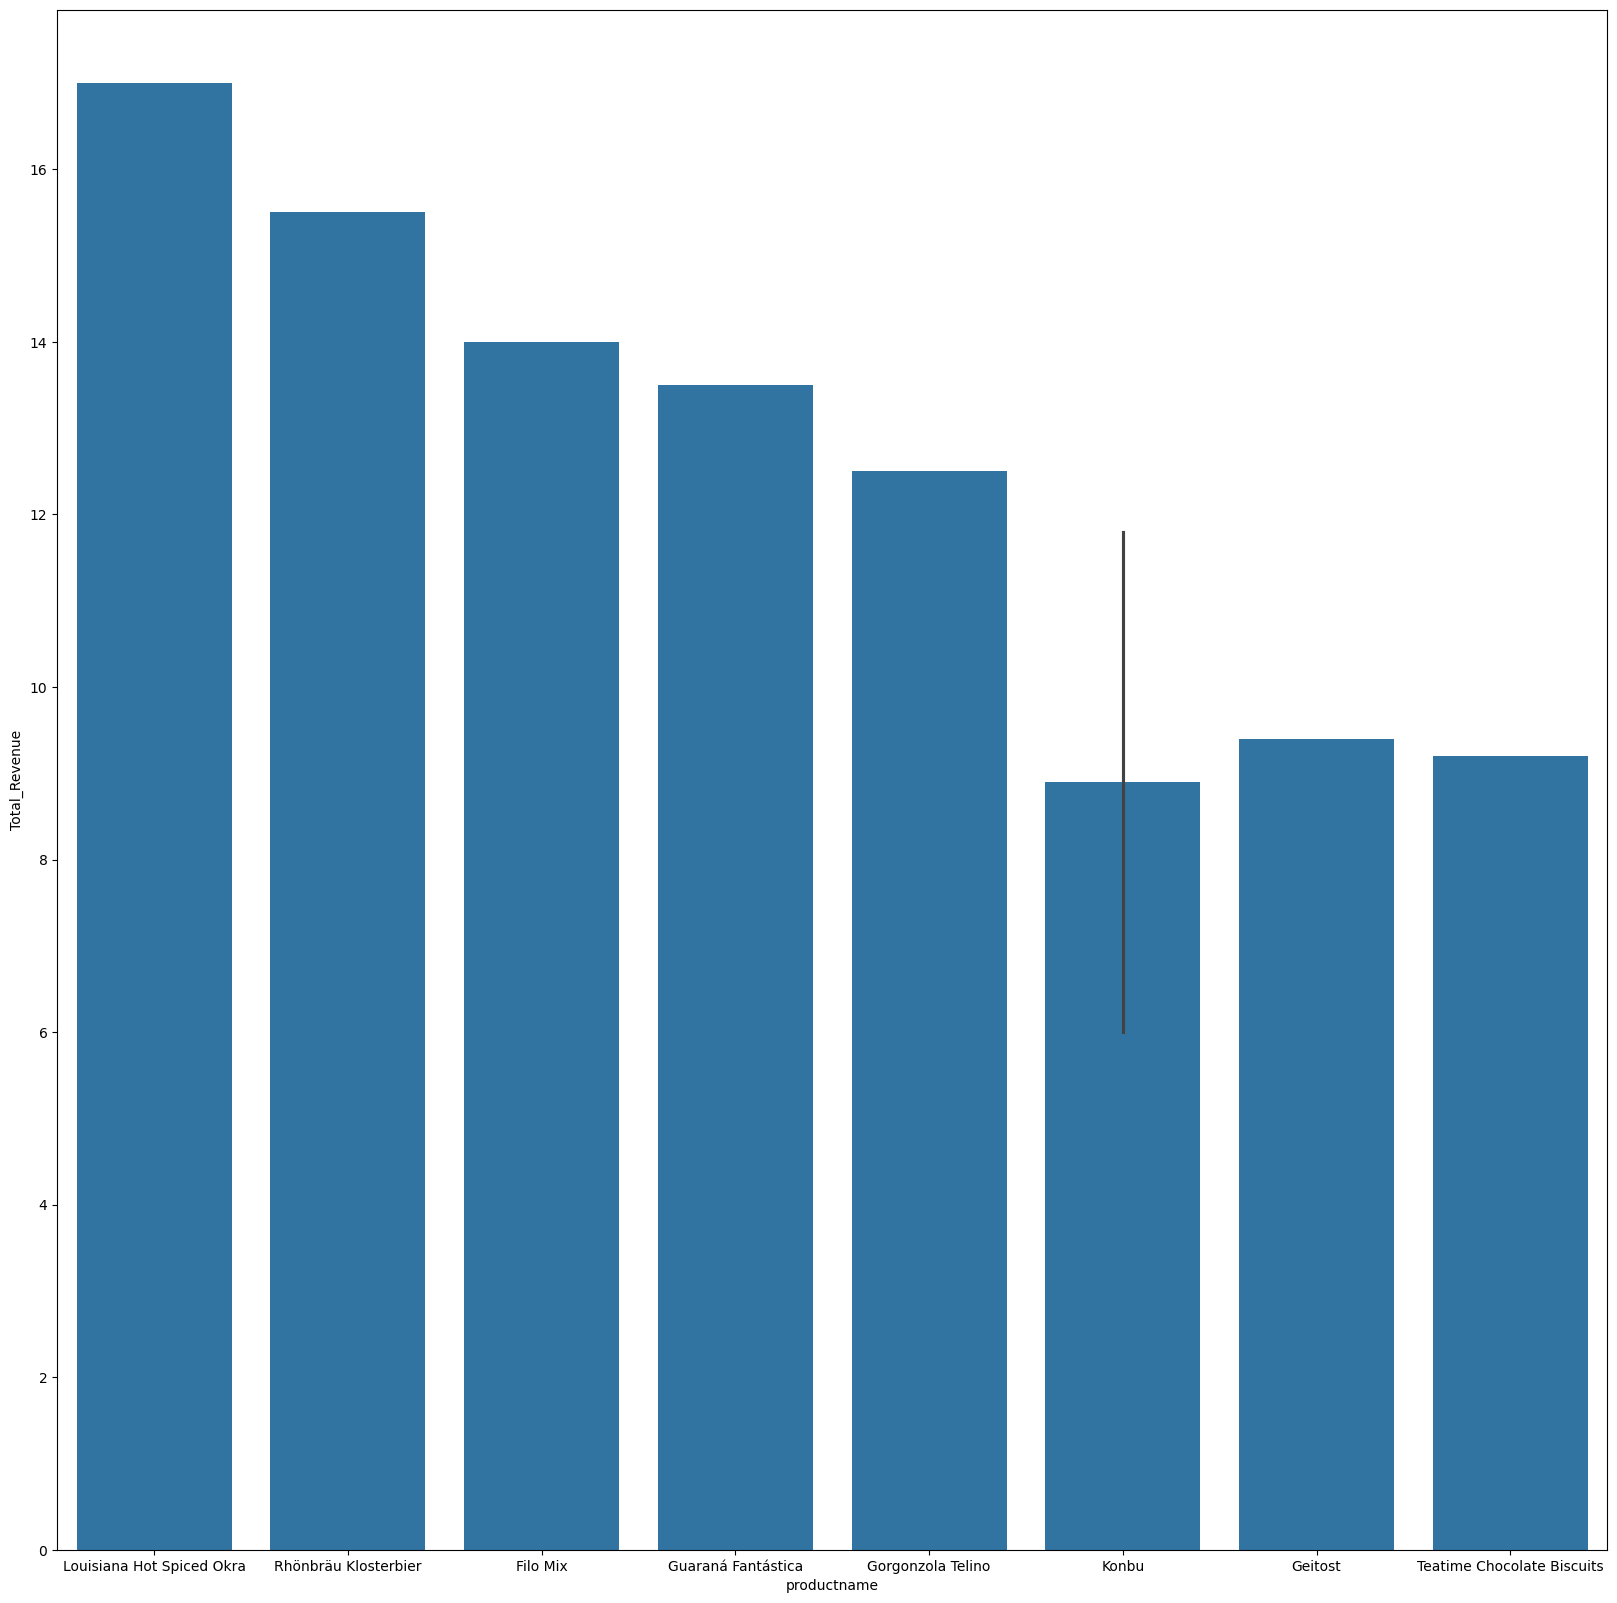

In [55]:
plt.figure(figsize=(20,20))
sns.barplot(x='productname', y='Total_Revenue',data=top_10_products)